<a href="https://colab.research.google.com/github/AlshangitiJumana/Image_processing/blob/main/Image_processing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Images
from google.colab import drive
from pathlib import Path

# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# keras
from keras.utils import to_categorical

# tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Visualise
import matplotlib.pyplot as plt

# Main
import numpy as np
import time
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Connecting to drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the data
p = Path('/content/drive/MyDrive/Colab Notebooks/image processing project/to process')
dirs = p.glob('*')
labels=[]
labels_dict ={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'suprise':6}

# Iterate over the directory
for f in dirs:
  label = str(f).split('/')[-1] # The classes

  cnt = 0 # Number of images in each class
  print("number of ",label,"images:")

  # Iterate over each folder and pic all images
  for image_path in f.glob("*"):
    img = image.load_img(image_path, target_size=(100,100)) # making it all the same size
    labels.append(labels_dict[label])
    cnt += 1
  print(cnt,'\n')


number of  neutral images:
100 

number of  fear images:
100 

number of  suprise images:
100 

number of  sad images:
100 

number of  angry images:
100 

number of  disgust images:
100 

number of  happy images:
100 



In [ ]:
# Paths
original_directory = '/content/drive/MyDrive/Colab Notebooks/image processing project/to process'
new_directory = '/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images'

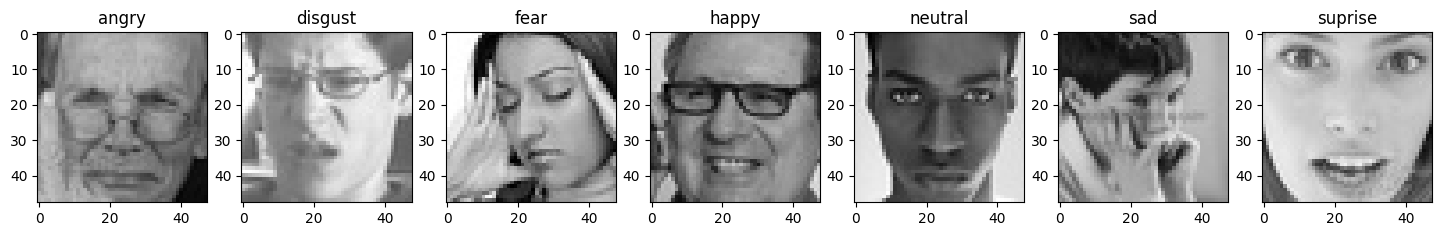

In [ ]:
# Samples of data
angry = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/angry/202.jpg')
disgust = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/disgust/2746.jpg')
fear  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/fear/314 copy.jpg')
happy  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/happy/28.jpg')
neutral  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/neutral/382.jpg')
sad  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/sad/3.jpg')
suprise  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/suprise/26.jpg')

# Visualize
plt.figure(figsize=(18, 6))
plt.subplot(1, 7, 1), plt.imshow(angry), plt.title('angry')
plt.subplot(1, 7, 2), plt.imshow(disgust), plt.title('disgust')
plt.subplot(1, 7, 3), plt.imshow(fear), plt.title('fear')
plt.subplot(1, 7, 4), plt.imshow(happy), plt.title('happy')
plt.subplot(1, 7, 5), plt.imshow(neutral), plt.title('neutral')
plt.subplot(1, 7, 6), plt.imshow(sad), plt.title('sad')
plt.subplot(1, 7, 7), plt.imshow(suprise), plt.title('suprise')
plt.show()

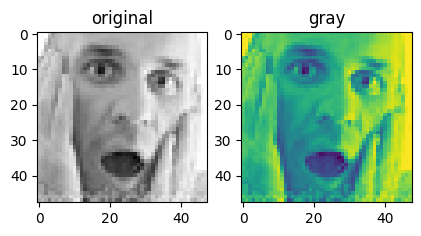

In [ ]:
# Before and after coverting to grayscale
image  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/suprise/319.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Visualize
plt.figure(figsize=(18, 6))
plt.subplot(1, 7, 1), plt.imshow(image), plt.title('original')
plt.subplot(1, 7, 2), plt.imshow(gray_image), plt.title('gray')
plt.show()

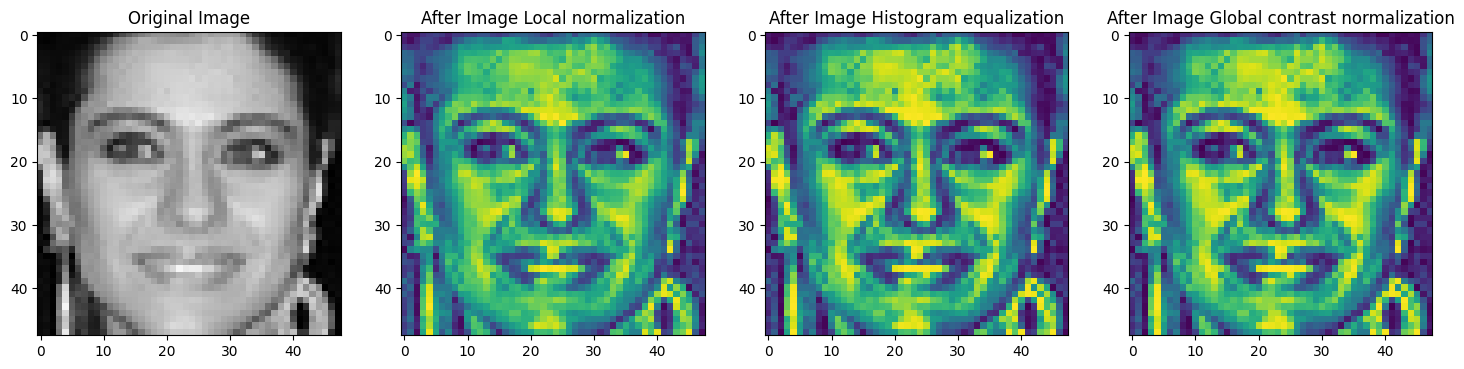

In [ ]:
# Example image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/happy/144.jpg')

# Steps to process the images
# Step 1:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2:
# Local normalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
Local_Normalized_image = clahe.apply(gray_image)

# Step 3:
# Histogram equalization
Histogram_equalized_image = cv2.equalizeHist(Local_Normalized_image)

# Step 4:
# Global contrast normalization
Global_contrast_normalized_image = cv2.normalize(Histogram_equalized_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Visualize
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(Local_Normalized_image), plt.title('After Image Local normalization')
plt.subplot(1, 4, 3), plt.imshow(Histogram_equalized_image), plt.title('After Image Histogram equalization')
plt.subplot(1, 4, 4), plt.imshow(Global_contrast_normalized_image), plt.title('After Image Global contrast normalization')
plt.show()


In [ ]:
# Create a directory to save the processed images
os.makedirs(new_directory, exist_ok=True)

# Iterate over each folder and pick all images
for ffile in os.listdir(original_directory):
    folder_path = os.path.join(original_directory, ffile)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            # Load the image
            image = cv2.imread(image_path)

            # Handling load error
            if image is None:
                print(f"Error loading image: {image_path}")
                continue

            # Process the image
            processed_image = image.copy()

            # Convert image to grayscale
            processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

            # Local normalization
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            processed_image = clahe.apply(processed_image)

            # Histogram equalization
            processed_image = cv2.equalizeHist(processed_image)

            # Global contrast normalization
            processed_image = cv2.normalize(processed_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

            # Save the processed image in the output directory with the same file name
            output_filename = os.path.join(new_directory, f'{ffile}_{image_file}')
            cv2.imwrite(output_filename, processed_image)

print("Processed images saved in the new directory:", new_directory)

Processed images saved in the new directory: /content/drive/MyDrive/Colab Notebooks/image processing project/processed_images


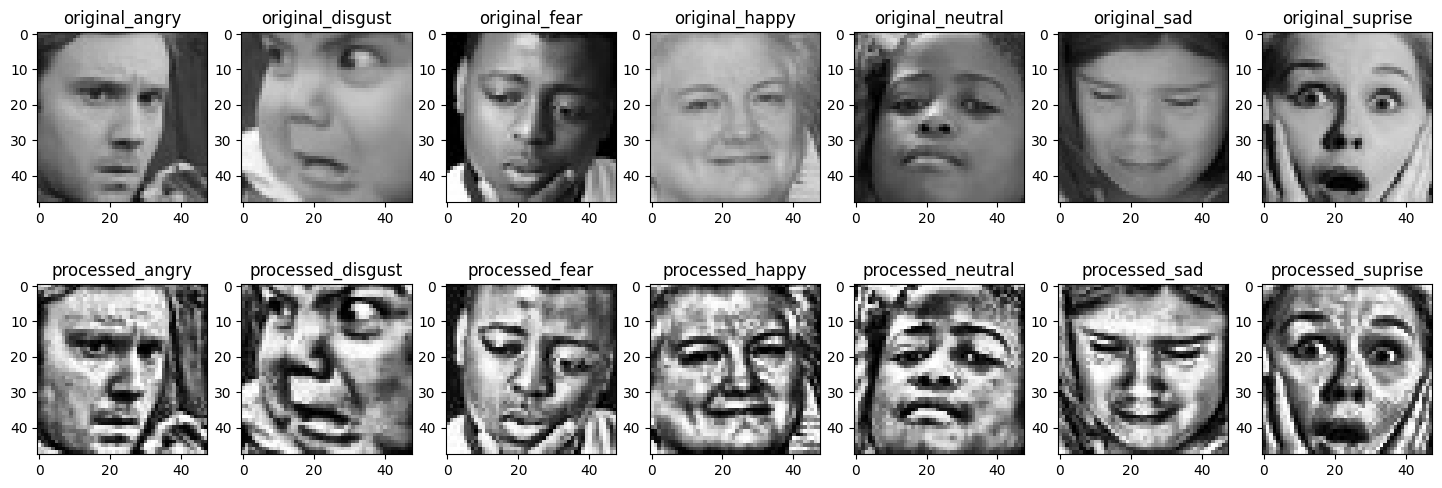

In [ ]:
# Show the diffrence between original and processed images

original_angry = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/angry/0.jpg')
processed_angry = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/angry/angry_0.jpg')

original_disgust = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/disgust/1096.jpg')
processed_disgust = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/disgust/disgust_1096.jpg')

original_fear = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/fear/106.jpg')
processed_fear = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/fear/fear_106.jpg')

original_happy = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/happy/100.jpg')
processed_happy = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/happy/happy_100.jpg')

original_neutral = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/neutral/102.jpg')
processed_neutral = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/neutral/neutral_102.jpg')

original_sad = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/sad/1003 copy.jpg')
processed_sad = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/sad/sad_1003 copy.jpg')

original_suprise = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/to process/suprise/1033 copy.jpg')
processed_suprise = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image processing project/processed_images/suprise/suprise_1033 copy.jpg')


plt.figure(figsize=(18, 6))
plt.subplot(2, 7, 1), plt.imshow(original_angry), plt.title('original_angry')
plt.subplot(2, 7, 2), plt.imshow(original_disgust), plt.title('original_disgust')
plt.subplot(2, 7, 3), plt.imshow(original_fear),plt.title('original_fear')
plt.subplot(2, 7, 4), plt.imshow(original_happy), plt.title('original_happy')
plt.subplot(2, 7, 5), plt.imshow(original_neutral),plt.title('original_neutral')
plt.subplot(2, 7, 6), plt.imshow(original_sad), plt.title('original_sad')
plt.subplot(2, 7, 7), plt.imshow(original_suprise), plt.title('original_suprise')
plt.subplot(2, 7, 8), plt.imshow(processed_angry), plt.title('processed_angry')
plt.subplot(2, 7, 9), plt.imshow(processed_disgust), plt.title('processed_disgust')
plt.subplot(2, 7, 10), plt.imshow(processed_fear), plt.title('processed_fear')
plt.subplot(2, 7, 11), plt.imshow(processed_happy), plt.title('processed_happy')
plt.subplot(2, 7, 12), plt.imshow(processed_neutral), plt.title('processed_neutral')
plt.subplot(2, 7, 13), plt.imshow(processed_sad), plt.title('processed_sad')
plt.subplot(2, 7, 14), plt.imshow(processed_suprise), plt.title('processed_suprise')
plt.show()

In [ ]:
# Original set with KNN
# Load images and labels
images = []
labels = []
for class_folder in os.listdir(original_directory):
    class_path = os.path.join(original_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = str(class_folder).split('/')[-1]  # Setting the labels to the folder name
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Start timing
start_time = time.time()

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)

# Predict the labels for the testing set
y_pred = knn.predict(X_test_flat)

# Calculate model speed (time taken per image)
end_time = time.time()
time_per_image = (end_time - start_time) / len(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("Time per image (sec):", time_per_image)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 17.857142857142858 %
Precision: 0.21766295407051708
Recall: 0.17857142857142858
Time per image (sec): 0.0009997895785740444
Confusion Matrix:
[[ 3  3  4  0  1  1  2]
 [ 3  4  6  0  2  0  3]
 [ 5  6  5  1  2  3  0]
 [ 2  2  3  6  3  0  4]
 [ 4  7  2  3  4  2  3]
 [ 5 11  0  0  2  0  2]
 [ 2  7  7  0  0  2  3]]


In [ ]:
# Processed set with KNN
# Load images and labels
images = []
labels = []
for class_folder in os.listdir(new_directory):
    class_path = os.path.join(new_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = str(class_folder).split('/')[-1]  # Setting the labels to the folder name
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Start timing
start_time = time.time()

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)

# Predict the labels for the testing set
y_pred = knn.predict(X_test_flat)

# Calculate model speed (time taken per image)
end_time = time.time()
time_per_image = (end_time - start_time) / len(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("Time per image (sec):", time_per_image)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 23.57142857142857 %
Precision: 0.21669733367407784
Recall: 0.2357142857142857
Time per image (sec): 0.00048363379069737023
Confusion Matrix:
[[ 2  7  2  2  2  6  0]
 [ 5 13  0  3  0  3  1]
 [ 4  5  0  1  3  6  3]
 [ 4  5  2  4  1  1  1]
 [ 5  3  1  1  3  1  0]
 [ 3  5  1  2  1  6  2]
 [ 3  5  0  2  3  2  5]]


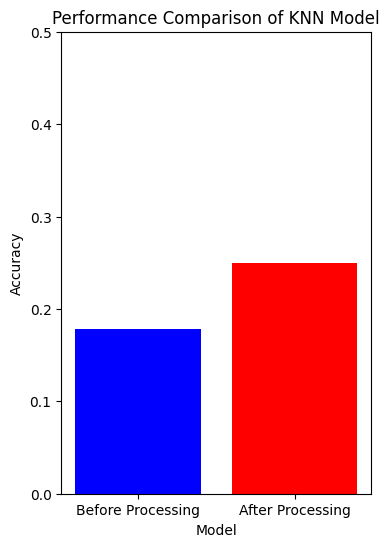

In [ ]:
# KNN Accuracy scores before and after processing
accuracy_scores = [0.17857142857142858, 0.25]
labels = ['Before Processing', 'After Processing']

# Create a bar plot
plt.figure(figsize=(4, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of KNN Model')
plt.ylim(0, 0.5)  # Set y-axis limit
plt.show()

In [ ]:
# Original set with SVM
# Load images and labels
images = []
labels = []
for class_folder in os.listdir(original_directory):
    class_path = os.path.join(original_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = str(class_folder).split('/')[-1]  # Setting the labels to the folder name
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Start timing
start_time = time.time()

# Train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_flat, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test_flat)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("Time per image (sec):", time_per_image)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 23.57142857142857 %
Precision: 0.25125569358178057
Recall: 0.2357142857142857
Time per image (sec): 0.00048363379069737023
Confusion Matrix:
[[2 1 2 5 3 0 1]
 [2 6 3 0 2 3 2]
 [4 3 2 1 2 6 4]
 [5 3 1 7 2 2 0]
 [3 4 3 0 5 8 2]
 [5 4 2 0 5 2 2]
 [0 4 3 2 1 2 9]]


In [ ]:
# Processed set with SVM
# Load images and labels
images = []
labels = []
for class_folder in os.listdir(new_directory):
    class_path = os.path.join(new_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = str(class_folder).split('/')[-1]  # Setting the labels to the folder name
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Start timing
start_time = time.time()

# Train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_flat, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test_flat)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("Time per image (sec):", time_per_image)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 28.57142857142857 %
Precision: 0.28415558126084445
Recall: 0.2857142857142857
Time per image (sec): 0.00048363379069737023
Confusion Matrix:
[[ 4  3  2  4  4  1  3]
 [ 2 10  4  3  2  2  2]
 [ 5  3  5  2  3  3  1]
 [ 1  2  4  5  2  1  3]
 [ 0  3  2  2  3  0  4]
 [ 6  3  1  1  1  4  4]
 [ 3  2  1  3  0  2  9]]


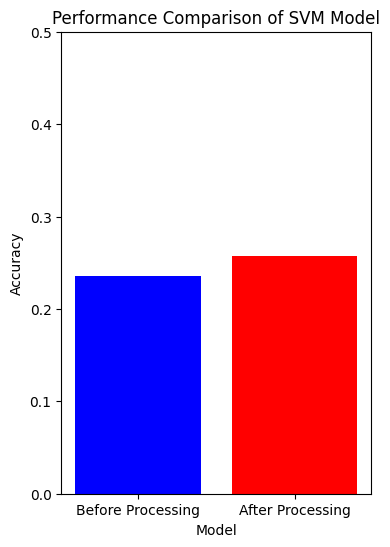

In [ ]:
# SVM Accuracy scores before and after processing
accuracy_scores = [0.2357142857142857, 0.2571428571428571]
labels = ['Before Processing', 'After Processing']

# Create a bar plot
plt.figure(figsize=(4, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of SVM Model')
plt.ylim(0, 0.5)  # Set y-axis limit
plt.show()

In [ ]:
# Original set with CNN
# Load images and labels
images = []
labels = []
for class_folder in os.listdir(original_directory):
    class_path = os.path.join(original_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = str(class_folder)  # Setting the labels to the folder name
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to numerical format (CNN only work with numerical)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data=(X_test, y_test_onehot))

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Convert numerical labels back to string format (to perform the evaluation methods)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/10
18/18 [==============================] - 4s 189ms/step - loss: 1.9583 - accuracy: 0.1214 - val_loss: 1.9526 - val_accuracy: 0.1000
Epoch 2/10
18/18 [==============================] - 3s 173ms/step - loss: 1.9467 - accuracy: 0.1500 - val_loss: 1.9489 - val_accuracy: 0.1000
Epoch 3/10
18/18 [==============================] - 2s 104ms/step - loss: 1.9436 - accuracy: 0.1536 - val_loss: 1.9484 - val_accuracy: 0.1000
Epoch 4/10
18/18 [==============================] - 2s 104ms/step - loss: 1.9352 - accuracy: 0.1536 - val_loss: 1.9380 - val_accuracy: 0.1357
Epoch 5/10
18/18 [==============================] - 2s 112ms/step - loss: 1.9222 - accuracy: 0.1875 - val_loss: 1.9240 - val_accuracy: 0.1857
Epoch 6/10
18/18 [==============================] - 2s 107ms/step - loss: 1.9021 - accuracy: 0.1964 - val_loss: 1.9176 - val_accuracy: 0.2214
Epoch 7/10
18/18 [==============================] - 2s 116ms/step - loss: 1.8335 - accuracy: 0.2607 - val_loss: 1.8523 - val_accuracy: 0.2643
Epoch 

In [ ]:
# Processed set with CNN
# Load images and labels
images = []
labels = []
for class_folder in os.listdir(new_directory):
    class_path = os.path.join(new_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = str(class_folder)  # Setting the labels to the folder name
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to numerical format (CNN only work with numerical)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data=(X_test, y_test_onehot))

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Convert numerical labels back to string format (to perform the evaluation methods)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/10
18/18 [==============================] - 3s 117ms/step - loss: 1.9617 - accuracy: 0.1411 - val_loss: 1.9607 - val_accuracy: 0.1143
Epoch 2/10
18/18 [==============================] - 2s 106ms/step - loss: 1.9455 - accuracy: 0.1536 - val_loss: 1.9499 - val_accuracy: 0.1000
Epoch 3/10
18/18 [==============================] - 2s 102ms/step - loss: 1.9447 - accuracy: 0.1714 - val_loss: 1.9470 - val_accuracy: 0.1000
Epoch 4/10
18/18 [==============================] - 2s 103ms/step - loss: 1.9425 - accuracy: 0.1768 - val_loss: 1.9449 - val_accuracy: 0.1643
Epoch 5/10
18/18 [==============================] - 3s 142ms/step - loss: 1.9340 - accuracy: 0.1929 - val_loss: 1.9347 - val_accuracy: 0.2286
Epoch 6/10
18/18 [==============================] - 3s 180ms/step - loss: 1.8947 - accuracy: 0.2429 - val_loss: 1.8896 - val_accuracy: 0.1929
Epoch 7/10
18/18 [==============================] - 2s 128ms/step - loss: 1.7769 - accuracy: 0.3107 - val_loss: 1.8862 - val_accuracy: 0.2357
Epoch 